In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Advertising.csv')
df.head()



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:

X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X



,TV,radio,newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [5]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print( "Bias:",b,"Weights:",theta)


Bias: 0.976886758887682 Weights: [0.36706227 0.11477507 0.85877105]


In [6]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:20]

array([ 2.96824697,  1.23601905,  2.12457287,  2.23733606,  2.12287849,
        2.33618521,  0.38962266,  0.08640794, -0.94399146,  0.67385585,
        0.2452667 ,  0.22476719,  1.93523163, -0.27691148,  1.90438755,
        2.25368435,  4.03161713,  2.67310412,  0.13951278,  0.53125208])

In [7]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/(len(Y))
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)


1.8467200204807697

In [8]:
theta

array([0.36706227, 0.11477507, 0.85877105])

In [18]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    #dw=(np.dot((y_hat-y),x)*2)/len(y)
    dw=np.dot((y_hat-y),x)
    dw1=(np.sum(dw)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw1
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
c1=get_cost(Y,Y_hat)
print("previous cost",c1)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.001)
print("After first update -Bias: ",b,"theta: ",theta)
c2=get_cost(Y,Y_hat)
print("updated cost",c2)


After initialization -Bias:  -3.8795797092307017e-16 theta:  [0.27917527 0.00337788 0.90143132]
previous cost 1.8467200204807697
After first update -Bias:  -3.8798017538356267e-16 theta:  [0.27917527 0.00337788 0.90143132]
previous cost 1.0637148450939076


In [10]:

def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost','bias'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost,b]
        result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of b and theta :",b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.0001,num_iterations=1000)




Final Estimate of b and theta : 0.7238527505743746 [0.54234663 0.05448164 0.76374761]


For different values of Learning Rate

In [11]:


learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Runing gradient descent for each learning rate and storing the results in a table
results = []
for alpha in learning_rates:
    gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha, 3000)
    final_cost = gd_iterations_df['cost'].iloc[-1]
    results.append({'learning_rate': alpha, 'final_cost': final_cost, 'bias': b, 'theta': theta, 'iterations': len(gd_iterations_df)})



Final Estimate of b and theta : 0.0022273547674217125 [0.36144842 0.46084753 0.37973943]
Final Estimate of b and theta : 5.8306377618834535e-06 [0.10723072 0.51405881 0.52688219]
Final Estimate of b and theta : 9.457724570563743e-09 [0.8464679  0.37966883 0.07869112]
Final Estimate of b and theta : 2.7850322816470822e-11 [0.32807485 0.17958144 0.68693209]
Final Estimate of b and theta : 2.1995986978701722e-14 [0.21119392 0.21305967 0.74558181]
Final Estimate of b and theta : -2.884132458928179e-17 [0.2764826  0.57828391 0.32939622]
Final Estimate of b and theta : -2.615884670966231e-16 [0.86209822 0.20334815 0.24246763]
Final Estimate of b and theta : 1.1080546848486397e-16 [0.50732687 0.7231352  0.00286378]
Final Estimate of b and theta : 1.110100855440334e-16 [0.13464326 0.74022194 0.27941702]
Final Estimate of b and theta : -3.8795797092307017e-16 [0.27917527 0.00337788 0.90143132]


In [12]:
results_df = pd.DataFrame(results)
results_df = results_df[['learning_rate', 'final_cost', 'iterations']]

print(results_df)


   learning_rate  final_cost  iterations
0          0.001    0.373148         300
1          0.002    0.753081         300
2          0.003    0.132384         300
3          0.004    0.693762         300
4          0.005    0.860466         300
5          0.006    0.430555         300
6          0.007    0.226268         300
7          0.008    0.192822         300
8          0.009    0.611436         300
9          0.010    1.063715         300


In [13]:
best_learning_rate = results_df['learning_rate'].iloc[np.argmin(results_df['final_cost'])]
print(f"Best learning rate: {best_learning_rate}, Final cost: {np.min(results_df['final_cost'])}")

Best learning rate: 0.003, Final cost: 0.13238385008259473


plotting graph

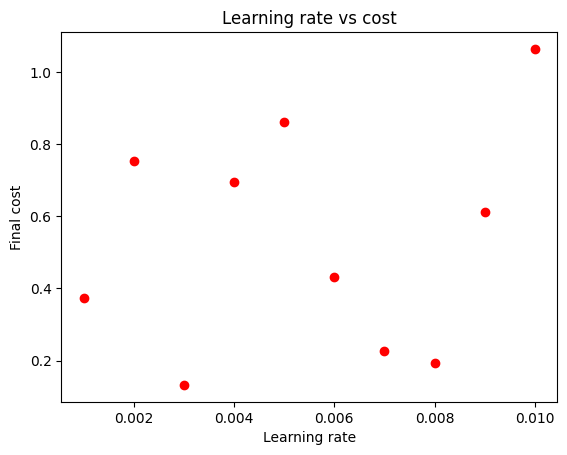

In [14]:
# Plot the learning rate vs cost graph
plt.plot(results_df['learning_rate'], results_df['final_cost'], 'ro')
plt.xlabel('Learning rate')
plt.ylabel('Final cost')
plt.title('Learning rate vs cost')
plt.show()


Text(0, 0.5, 'Cost or MSE')

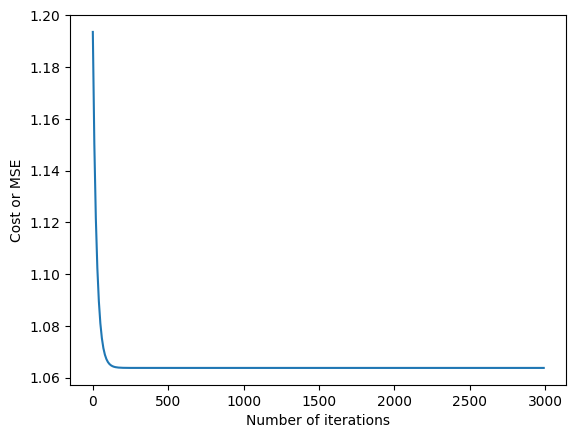

In [15]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")


Text(0, 0.5, 'bias')

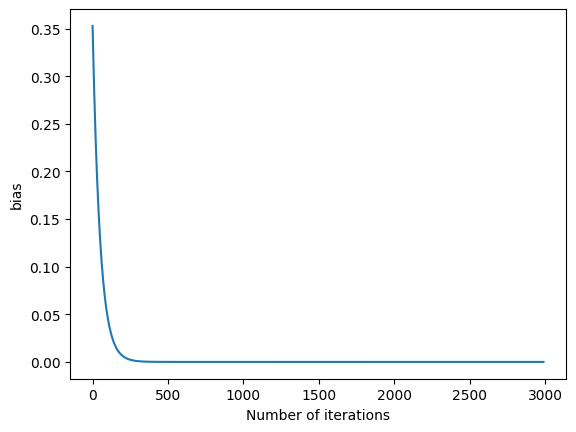

In [16]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['bias'])
plt.xlabel("Number of iterations")
plt.ylabel("bias")

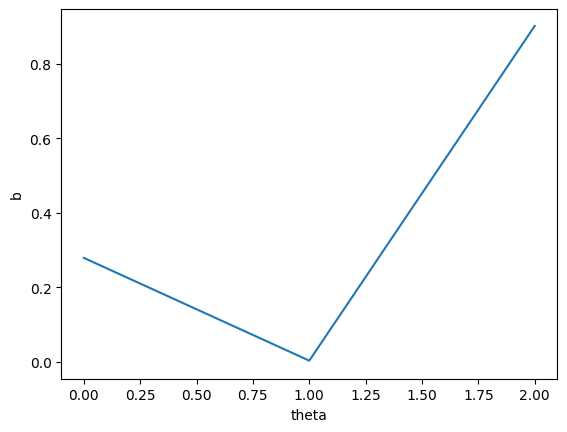

In [17]:
plt.ylabel('b')
plt.xlabel('theta')

plt.plot(theta)
plt.plot(b)